In [14]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

In [15]:
#Reading the data
df=pd.read_csv('Data.csv')
df.head(2)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No


In [16]:
df.shape

(110527, 14)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


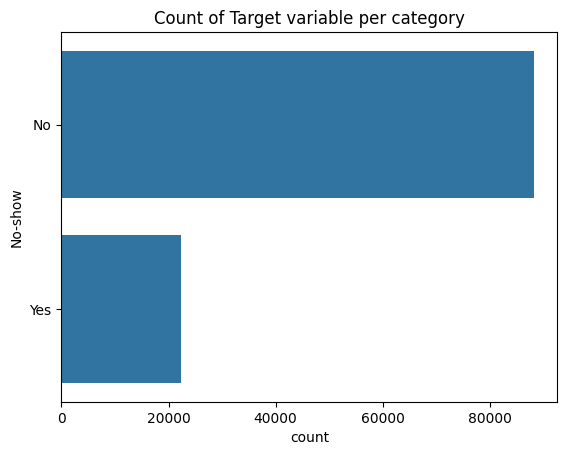

In [19]:
sns.countplot(data=df,y='No-show',orient='h')
plt.title('Count of Target variable per category')
plt.show()

In [20]:
#Percentage of appointments or not
(df['No-show'].value_counts()/df.shape[0])*100

No-show
No     79.806744
Yes    20.193256
Name: count, dtype: float64

In [21]:
df['No-show'].value_counts()

No-show
No     88208
Yes    22319
Name: count, dtype: int64

## Data cleaning

In [18]:
df.isna().sum().sum()

0

There are no missing values

##### As we don't have any null records, there's no data cleaning required

In [22]:
for i in df.columns:
    print(i)
    print(df[i].unique())

PatientId
[2.98724998e+13 5.58997777e+14 4.26296230e+12 ... 7.26331493e+13
 9.96997666e+14 1.55766317e+13]
AppointmentID
[5642903 5642503 5642549 ... 5630692 5630323 5629448]
Gender
['F' 'M']
ScheduledDay
['2016-04-29T18:38:08Z' '2016-04-29T16:08:27Z' '2016-04-29T16:19:04Z' ...
 '2016-04-27T16:03:52Z' '2016-04-27T15:09:23Z' '2016-04-27T13:30:56Z']
AppointmentDay
['2016-04-29T00:00:00Z' '2016-05-03T00:00:00Z' '2016-05-10T00:00:00Z'
 '2016-05-17T00:00:00Z' '2016-05-24T00:00:00Z' '2016-05-31T00:00:00Z'
 '2016-05-02T00:00:00Z' '2016-05-30T00:00:00Z' '2016-05-16T00:00:00Z'
 '2016-05-04T00:00:00Z' '2016-05-19T00:00:00Z' '2016-05-12T00:00:00Z'
 '2016-05-06T00:00:00Z' '2016-05-20T00:00:00Z' '2016-05-05T00:00:00Z'
 '2016-05-13T00:00:00Z' '2016-05-09T00:00:00Z' '2016-05-25T00:00:00Z'
 '2016-05-11T00:00:00Z' '2016-05-18T00:00:00Z' '2016-05-14T00:00:00Z'
 '2016-06-02T00:00:00Z' '2016-06-03T00:00:00Z' '2016-06-06T00:00:00Z'
 '2016-06-07T00:00:00Z' '2016-06-01T00:00:00Z' '2016-06-08T00:00:00Z']
Age


In [23]:
#Renaming the column names with proper spellings
df.rename(columns={'Hipertension':'Hypertension','Handcap':'Handicap','SMS_received':'SMSreceived','No-show':'Noshow'},inplace=True)

In [24]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMSreceived', 'Noshow'],
      dtype='object')

In [25]:
#Droping insignificant columns
df.drop(columns=['PatientId','AppointmentID','Neighbourhood'],inplace=True)

In [26]:
df.describe()

,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSreceived
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [27]:
#Creating an age group column
label=['{0}-{1}'.format(i,i+20) for i in range(1,118,23)]
df['Age_group']=pd.cut(df['Age'],range(1,130,20),right=False,labels=label)

In [28]:
#Changing the datatype 
df['ScheduledDay']=pd.to_datetime(df['ScheduledDay']).dt.date.astype('datetime64[ns]')

In [29]:
df['AppointmentDay']=pd.to_datetime(df['AppointmentDay']).dt.date.astype('datetime64[ns]')

In [30]:
#Droping the data where age is -1
df.drop(df[df['Age']==-1].index,inplace=True)

In [31]:
df.head(3)

,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSreceived,Noshow,Age_group
0,F,2016-04-29,2016-04-29,62,0,1,0,0,0,0,No,70-90
1,M,2016-04-29,2016-04-29,56,0,0,0,0,0,0,No,47-67
2,F,2016-04-29,2016-04-29,62,0,0,0,0,0,0,No,70-90


In [32]:
df['Noshow']=np.where(df['Noshow']=='Yes',1,0)

In [33]:
df_dummies=pd.get_dummies(df)
df_dummies.head(3)

,ScheduledDay,AppointmentDay,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSreceived,Noshow,Gender_F,Gender_M,Age_group_1-21,Age_group_24-44,Age_group_47-67,Age_group_70-90,Age_group_93-113,Age_group_116-136
0,2016-04-29,2016-04-29,62,0,1,0,0,0,0,0,True,False,False,False,False,True,False,False
1,2016-04-29,2016-04-29,56,0,0,0,0,0,0,0,False,True,False,False,True,False,False,False
2,2016-04-29,2016-04-29,62,0,0,0,0,0,0,0,True,False,False,False,False,True,False,False


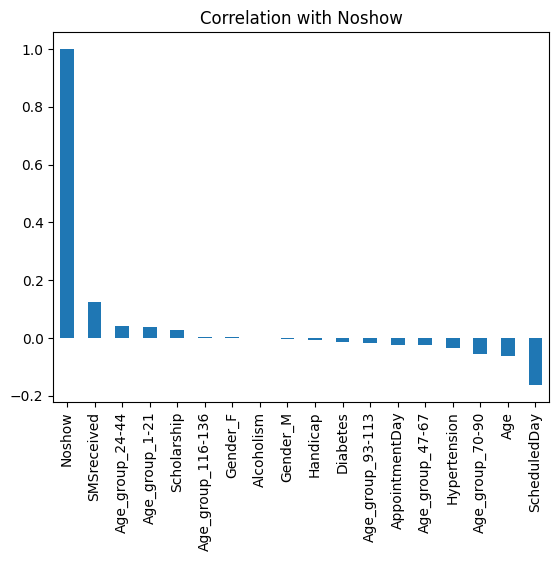

In [34]:
df_dummies.corr()['Noshow'].sort_values(ascending=False).plot(kind='bar')
plt.title('Correlation with Noshow')
plt.show()

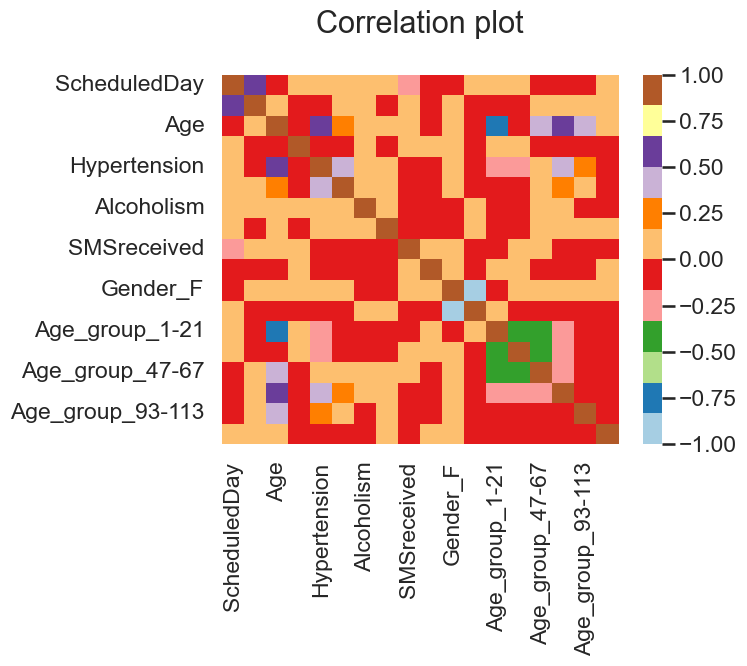

In [73]:
sns.heatmap(df_dummies.corr(),cmap='Paired')
plt.title('Correlation plot')
plt.show()

## Bivariate Analysis

In [36]:
df_target0=df.loc[df['Noshow']==0]
df_target1=df.loc[df['Noshow']==1]

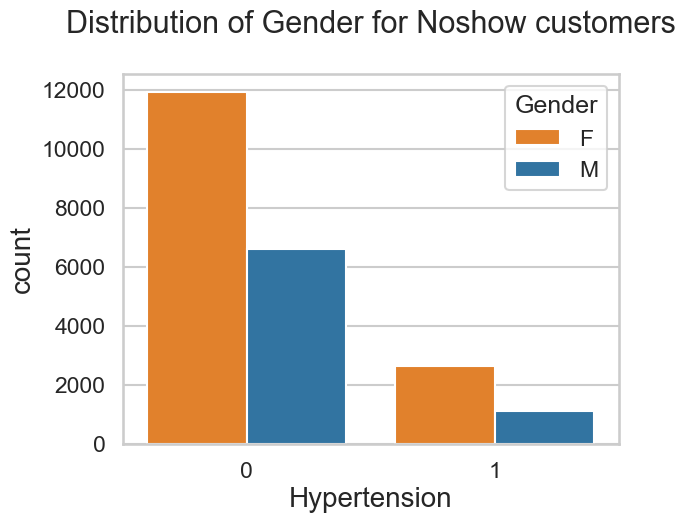

In [66]:
colors = {"M": "#1f77b4", "F": "#ff7f0e"}
sns.countplot(df_target1,x='Hypertension',hue='Gender',palette=colors)
plt.title('Distribution of Gender for Noshow customers')
plt.show()

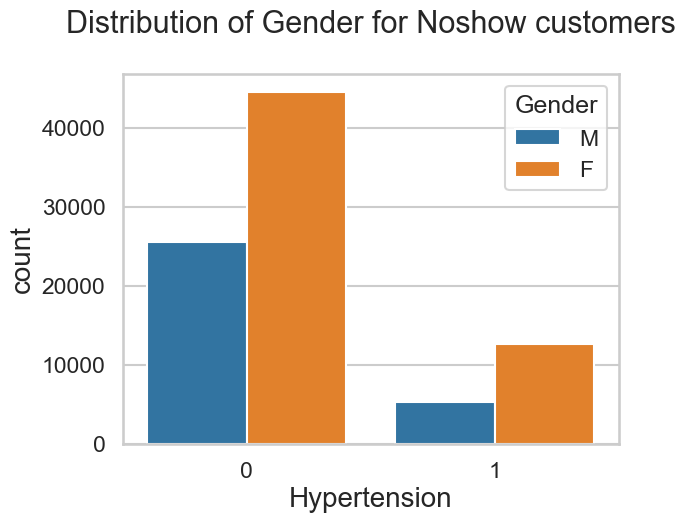

In [67]:
colors = {"M": "#1f77b4", "F": "#ff7f0e"}
sns.countplot(df_target0,x='Hypertension',hue='Gender',palette=colors)
plt.title('Distribution of Gender for Noshow customers')
plt.show()

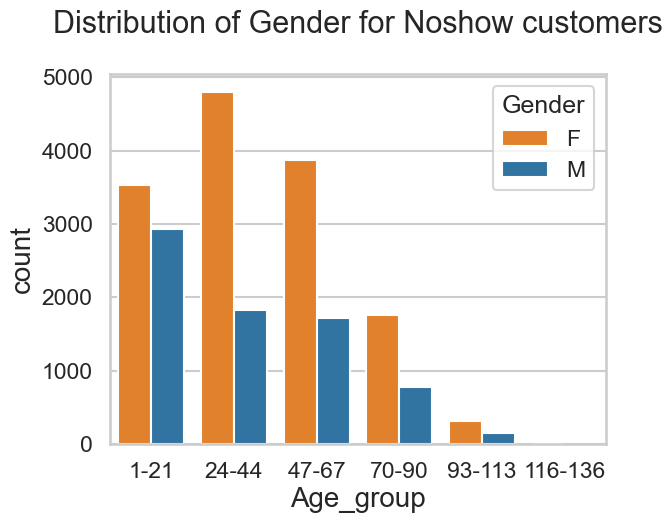

In [68]:
colors = {"M": "#1f77b4", "F": "#ff7f0e"}
sns.countplot(df_target1,x='Age_group',hue='Gender',palette=colors)
plt.title('Distribution of Gender for Noshow customers')
plt.show()

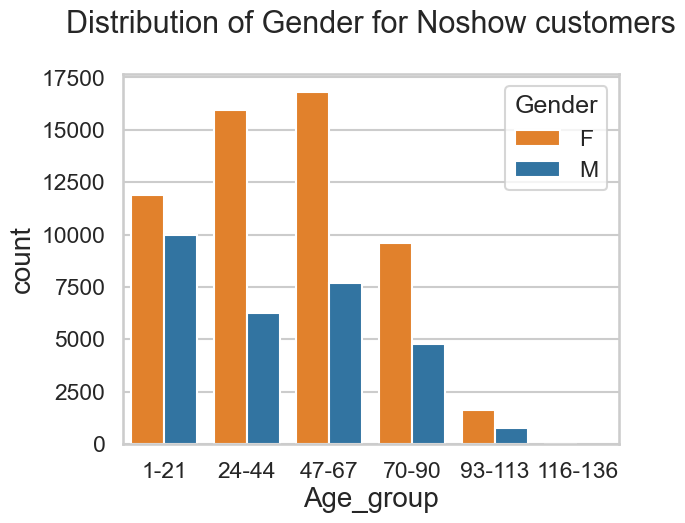

In [69]:
colors = {"M": "#1f77b4", "F": "#ff7f0e"}
sns.countplot(df_target0,x='Age_group',hue='Gender',palette=colors)
plt.title('Distribution of Gender for Noshow customers')
plt.show()

## Insights

1. Female patients have taken more appointments then male patients
2. Ratio of Nohow and Show is almost equal for age group except Age 0 and Age 1 with 80% show rate for each age group
3. Each Neighbourhood have almost 80% show rate
4. There are 99666 patients without Scholarship and out of them around 80% have come for the visit and out of the 21801 patients with Scholarship around 75% of them have come for the visit.
5. There are around 88,726 patients without Hypertension and out of them around 78% have come for the visit and Out of the 21801 patients with Hypertension around 85% of them have come for the visit.
6. There are around 102,584 patients without Diabetes and out of them around 80% have come for the visit and Out of the 7,943 patients with Diabetes around 83% of them have come for the visit.
7. There are around 75,045 patients who have not received SMS and out of them around 84% have come for the visit and out of the 35,482 patients who have received SMS around 72% of them have come for the visit. 
8. There is no appointments on sunday and on saturday appointments are very less in comparision to other week days